# investigating hypoxic control treatment

this treatment resulted in 3 pairwise comparisons with DMGs - interested if all of these DMGs are unique to hypoxia control (HC)

In [1]:
library(tidyverse)
library(ggvenn)
library(dplyr)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: grid



### loading and formatting

In [2]:
# importing csv files

#1 control control vs. hypoxic control
CC_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HC.csv')

#2 control hypoxic vs. hypoxic control
CH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CH_vs_HC.csv')

#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_HC.csv')

#######################################

#4 hypoxic hypoxic vs. control hypoxic
HH_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/HH_vs_CH.csv')

#5 hypoxic hypoxic vs. control control
HH_CC <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_HH.csv')

#6 control control vs. control hypoxic
CC_CH <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/deseq_res_files/CC_vs_CH.csv')


pulling out significant DMGs for the three pairwise comparisons with HC (adjusted p-value < 0.05)

In [3]:
# significant DMGs

# control control vs. hypoxic control
sig_CC_HC <- filter(CC_HC, CC_HC$padj < 0.05)
dim(sig_CC_HC) # 20 total sig DMGs

# control hypoxic vs. hypoxic control
sig_CH_HC <- filter(CH_HC, CH_HC$padj < 0.05)
dim(sig_CH_HC) # 258 total sig DMGs

# hypoxic hypoxic vs. hypoxic control
sig_HH_HC <- filter(HH_HC, HH_HC$padj < 0.05)
dim(sig_HH_HC) # 124 total sig DMGs

[1] 20  7

[1] 258   7

[1] 124   7

adding columns to the dfs - need to assign which direction the methylation is in order to assign colors in the plots - also adding a column to denote what the pairwise comparison is in case I end up combining dataframes and faceting by this later on... 

In [4]:
# column 'pair' to denote the pairwise comparison this data is originally from 
CC_HC$pair <- 'CC_HC' #1
CH_HC$pair <- 'CH_HC' #2
HH_HC$pair <- 'HH_HC' #3
HH_CH$pair <- 'HH_CH' #4
HH_CC$pair <- 'HH_CC' #5
CC_CH$pair <- 'CC_CH' #6

In [5]:
#1 control control vs. hypoxic control
CC_HC$methyl <- ifelse(CC_HC$log2FoldChange<0 & CC_HC$padj < 0.05, "CC", 
                        ifelse(CC_HC$log2FoldChange>0 & CC_HC$padj < 0.05, "HC", 
                               "not significant"))

#2 control hypoxic vs. hypoxic control
CH_HC$methyl <- ifelse(CH_HC$log2FoldChange<0 & CH_HC$padj < 0.05, "CH", 
                        ifelse(CH_HC$log2FoldChange>0 & CH_HC$padj < 0.05, "HC", 
                               "not significant"))

#3 hypoxic hypoxic vs. hypoxic control
HH_HC$methyl <- ifelse(HH_HC$log2FoldChange<0 & HH_HC$padj < 0.05, "HC", 
                        ifelse(HH_HC$log2FoldChange>0 & HH_HC$padj < 0.05, "HH", 
                               "not significant"))

#4 hypoxic hypoxic vs. control hypoxic
HH_CH$methyl <- ifelse(HH_CH$log2FoldChange<0 & HH_CH$padj < 0.05, "CH",
                        ifelse(HH_CH$log2FoldChange>0 & HH_CH$padj < 0.05, "HH", 
                               "not significant"))

#5 hypoxic hypoxic vs. control control
HH_CC$methyl <- ifelse(HH_CC$log2FoldChange<0 & HH_CC$padj < 0.05, "CC", 
                        ifelse(HH_CC$log2FoldChange>0 & HH_CC$padj < 0.05, "HH", 
                               "not significant"))



#6 control control vs. control hypoxic
CC_CH$methyl <- ifelse(CC_CH$log2FoldChange<0 & CC_CH$padj < 0.05, "CC", 
                        ifelse(CC_CH$log2FoldChange>0 & CC_CH$padj < 0.05, "CH", 
                               "not significant"))


### ggplot Volcano plots 
Volcano plots made with ggplot of the pairwise comparisons from DESeq2

In [6]:
# to change size of plots
options(repr.plot.width=10, repr.plot.height=5)

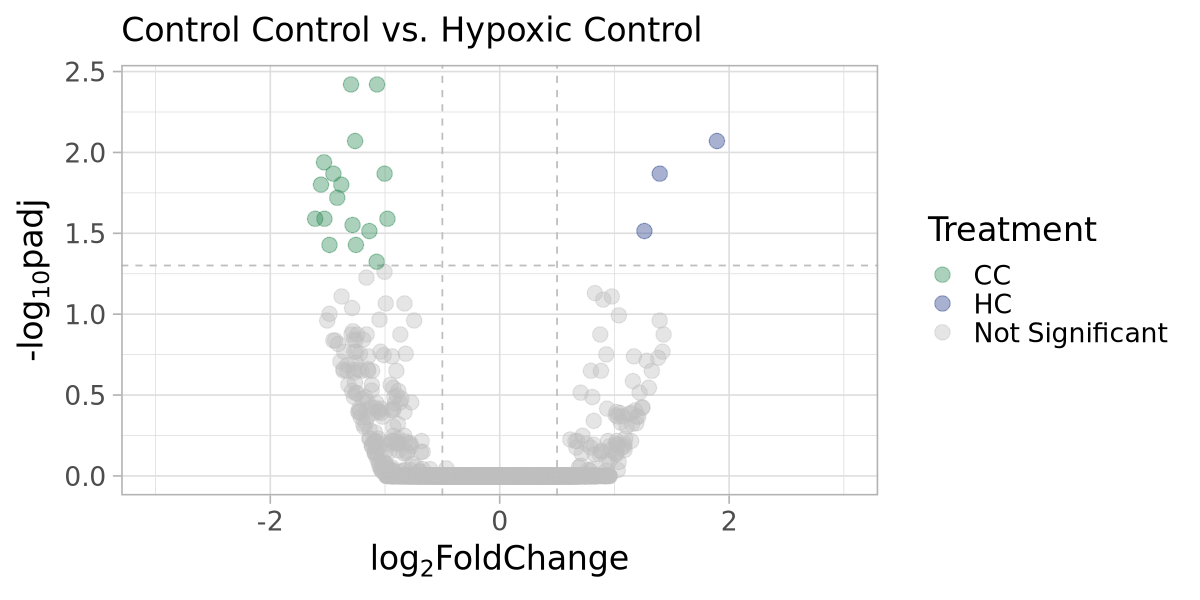

In [7]:
#1 control control vs. hypoxic control
CC_HC <- na.omit(CC_HC) # removing rows with NA for padj

volcano1 <- ggplot(data = CC_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                       labs(subtitle = 'Control Control vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano1

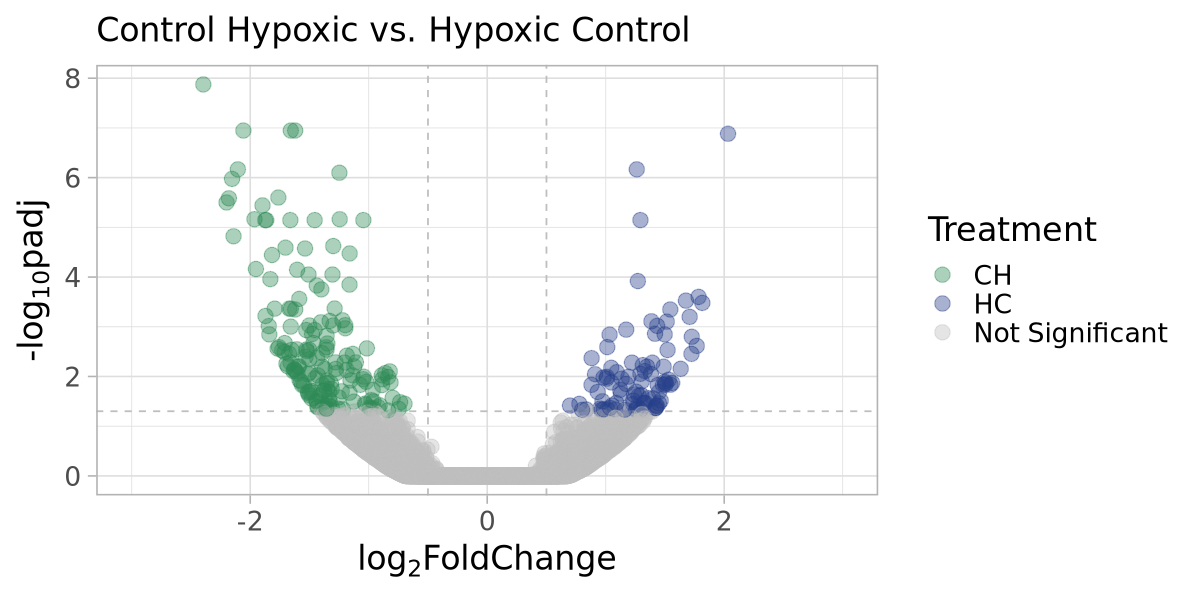

In [8]:
#2 control hypoxic vs. hypoxic control
CH_HC <- na.omit(CH_HC) # removing rows with NA for padj

volcano2 <- ggplot(data = CH_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CH', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Hypoxic vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano2

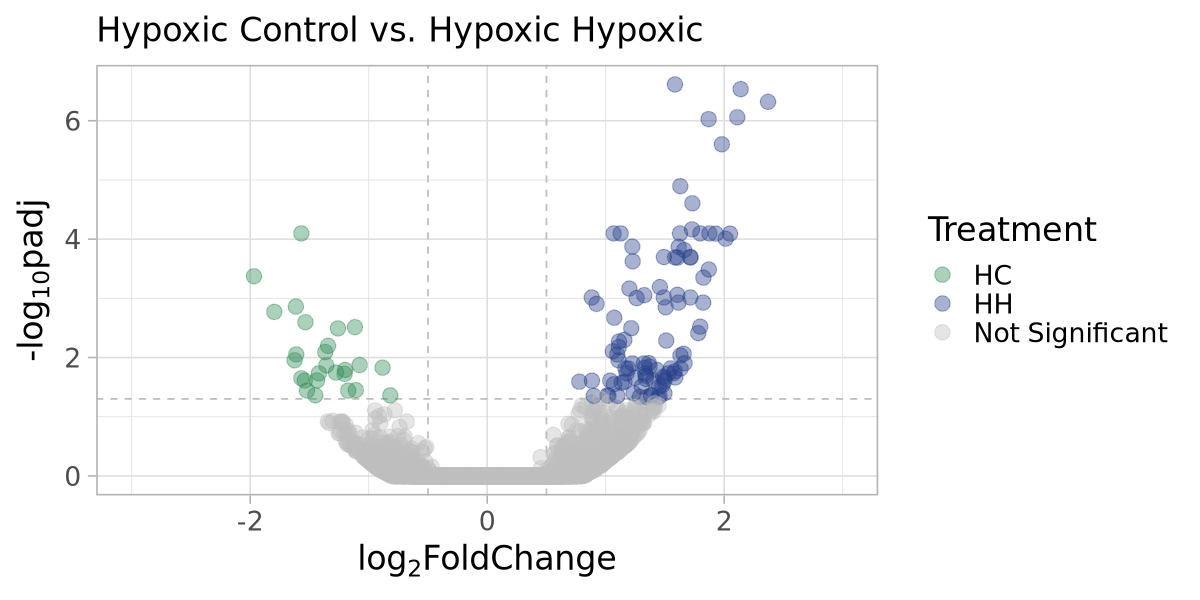

In [9]:
#3 hypoxic hypoxic vs. hypoxic control
HH_HC <- na.omit(HH_HC) # removing rows with NA for padj

volcano3 <- ggplot(data = HH_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('HC', 'HH', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Hypoxic Control vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano3

want to actually flip the above plot so that HC is on the right and HH is on the left - to do this, make pos. LFC to neg and vice versa

In [10]:
# Switch the signs
HH_HC_flip <- HH_HC %>%
  mutate(log2FoldChange = -log2FoldChange)

HH_HC_flip$methyl <- ifelse(HH_HC_flip$log2FoldChange<0 & HH_HC_flip$padj < 0.05, "HH", 
                        ifelse(HH_HC_flip$log2FoldChange>0 & HH_HC_flip$padj < 0.05, "HC", 
                               "not significant"))

# View the modified dataframe
head(HH_HC_flip)
head(HH_HC)


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,0.07669030,0.1125398,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
4,LOC111101273,76.71302,0.06379838,0.1495362,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
5,LOC111101250,123.47481,0.04446060,0.1737339,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
6,LOC111101262,269.44440,0.07196657,0.1174022,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
7,LOC111133260,29.44709,-1.58573394,0.2666112,5.0100451,5.441729e-07,0.0002034527,HH_HC,HH
8,LOC111113503,16.75282,0.47230058,0.2772601,-0.8017763,4.226824e-01,1.0000000000,HH_HC,not significant


,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,-0.07669030,0.1125398,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
4,LOC111101273,76.71302,-0.06379838,0.1495362,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
5,LOC111101250,123.47481,-0.04446060,0.1737339,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
6,LOC111101262,269.44440,-0.07196657,0.1174022,0.0000000,1.000000e+00,1.0000000000,HH_HC,not significant
7,LOC111133260,29.44709,1.58573394,0.2666112,5.0100451,5.441729e-07,0.0002034527,HH_HC,HH
8,LOC111113503,16.75282,-0.47230058,0.2772601,-0.8017763,4.226824e-01,1.0000000000,HH_HC,not significant


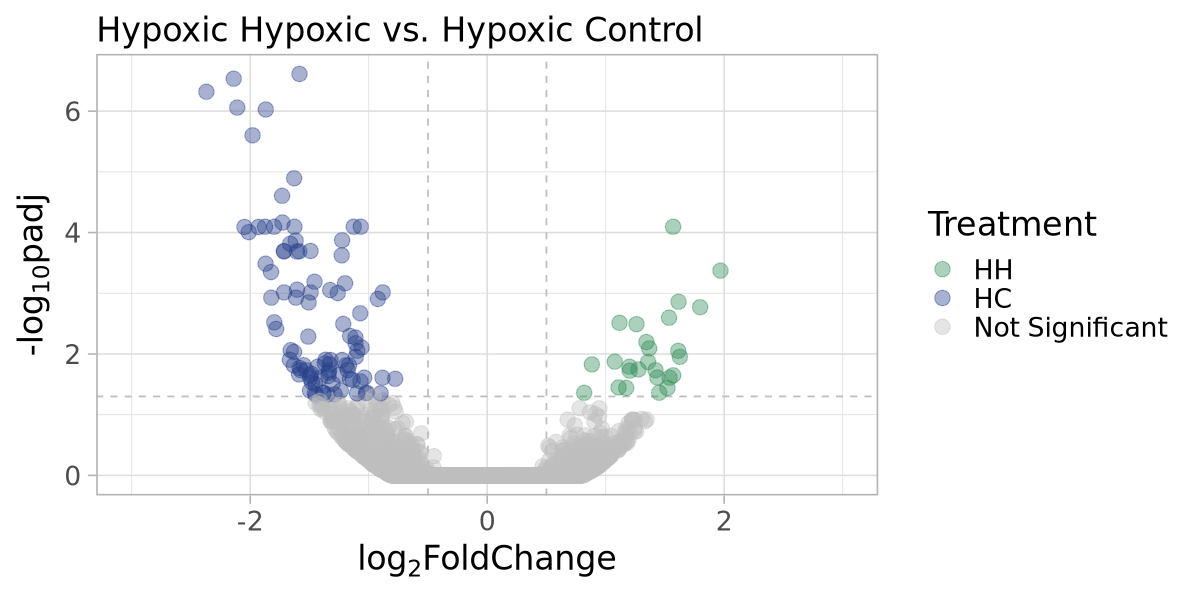

In [11]:
#3 hypoxic hypoxic vs. hypoxic control FLIPPED
volcano3.5 <- ggplot(data = HH_HC_flip, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('HH', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Hypoxic Hypoxic vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano3.5

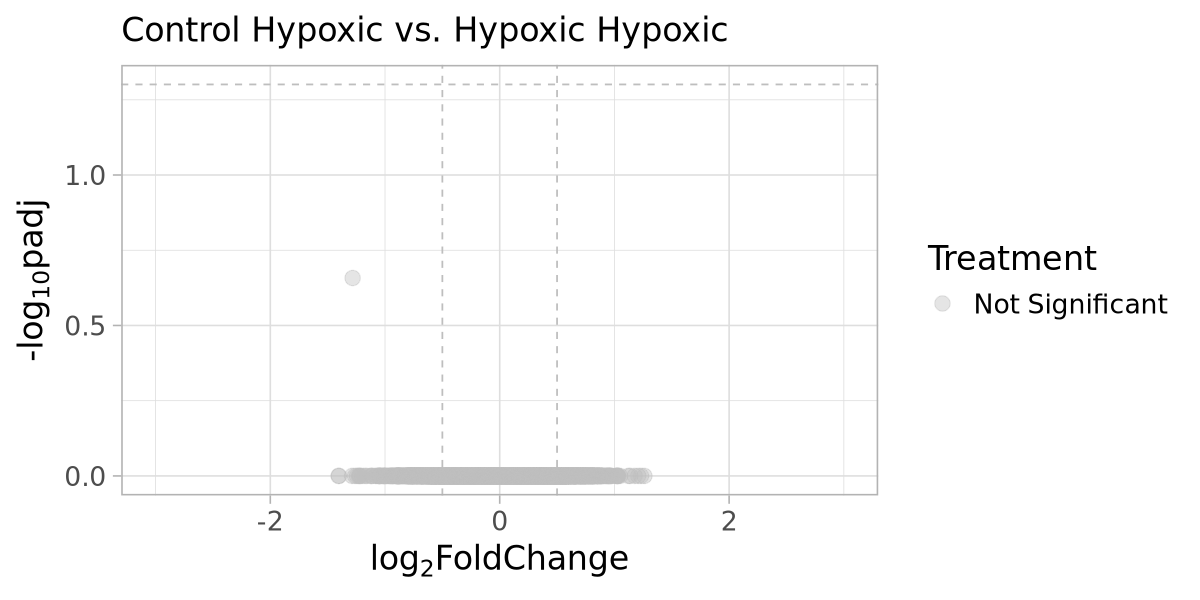

In [12]:
#4 hypoxic hypoxic vs. control hypoxic
HH_CH <- na.omit(HH_CH) # removing rows with NA for padj

volcano4 <- ggplot(data = HH_CH, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('gray'),
                                           labels=c('Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Hypoxic vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano4

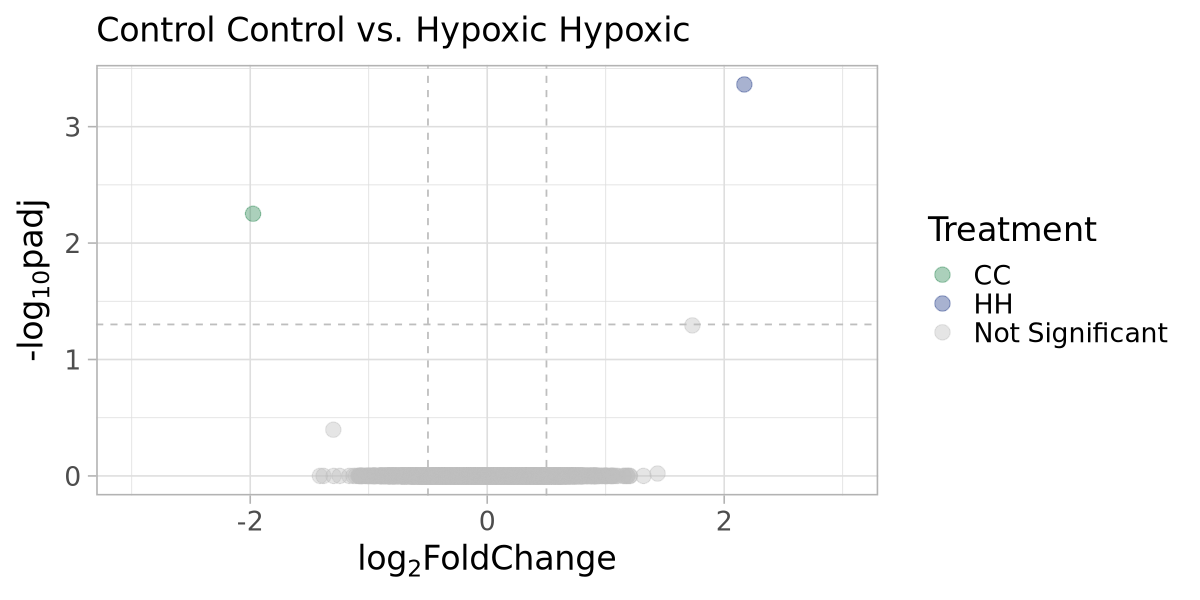

In [13]:
#5 hypoxic hypoxic vs. control control
HH_CC <- na.omit(HH_CC) # removing rows with NA for padj

volcano5 <- ggplot(data = HH_CC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HH', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Control vs. Hypoxic Hypoxic',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano5

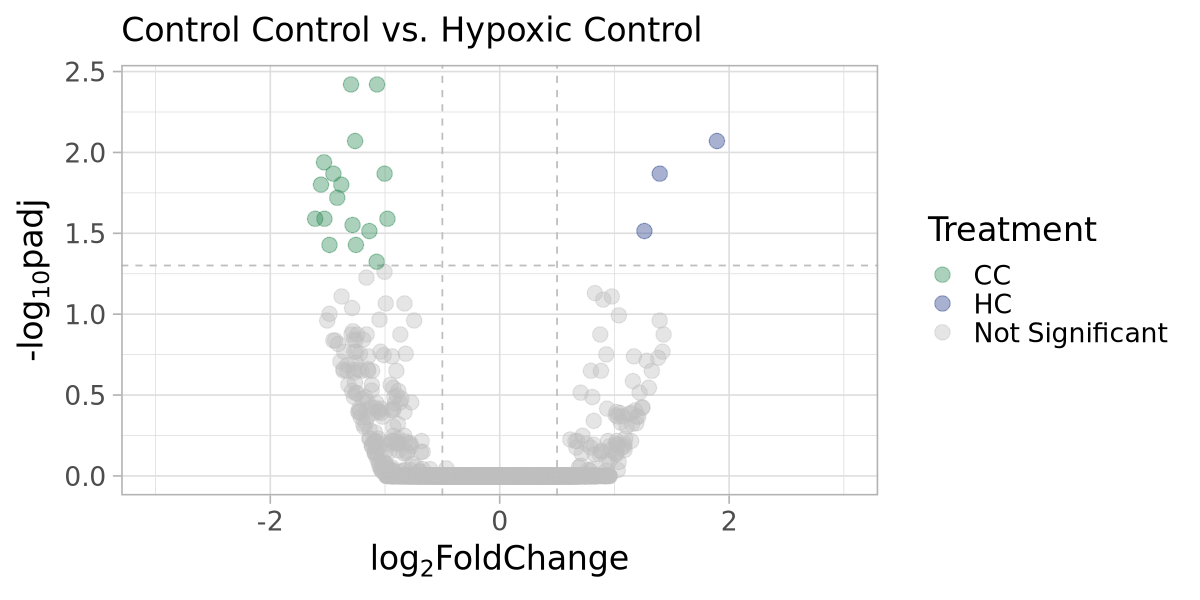

In [14]:
#6 control control vs. control hypoxic
CC_HC <- na.omit(CC_HC) # removing rows with NA for padj

volcano6 <- ggplot(data = CC_HC, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
                        scale_color_manual(values = c('seagreen4','royalblue4', 'gray'),
                                           labels=c('CC', 'HC', 'Not Significant')) + 
                        theme_light(base_size=20) + 
                        labs(subtitle = 'Control Control vs. Hypoxic Control',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano6

putting all the data together into one ggplot grid...

In [15]:
mega_df <- na.omit(rbind(CC_HC, CH_HC, HH_HC_flip, HH_CH, HH_CC, CC_CH))
head(mega_df)

,X,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,pair,methyl
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
3,LOC111124802,213.00131,0.06672759,0.1192547,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
4,LOC111101273,76.71302,-0.20267259,0.1576994,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
5,LOC111101250,123.47481,-0.13501125,0.1799700,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
6,LOC111101262,269.44440,0.14318006,0.1234759,0.0000000,1.000000e+00,1.00000000,CC_HC,not significant
7,LOC111133260,29.44709,-1.41645334,0.2784943,-4.1884287,2.808925e-05,0.01908026,CC_HC,CC
8,LOC111113503,16.75282,0.37259562,0.2901756,0.4224877,6.726691e-01,1.00000000,CC_HC,not significant


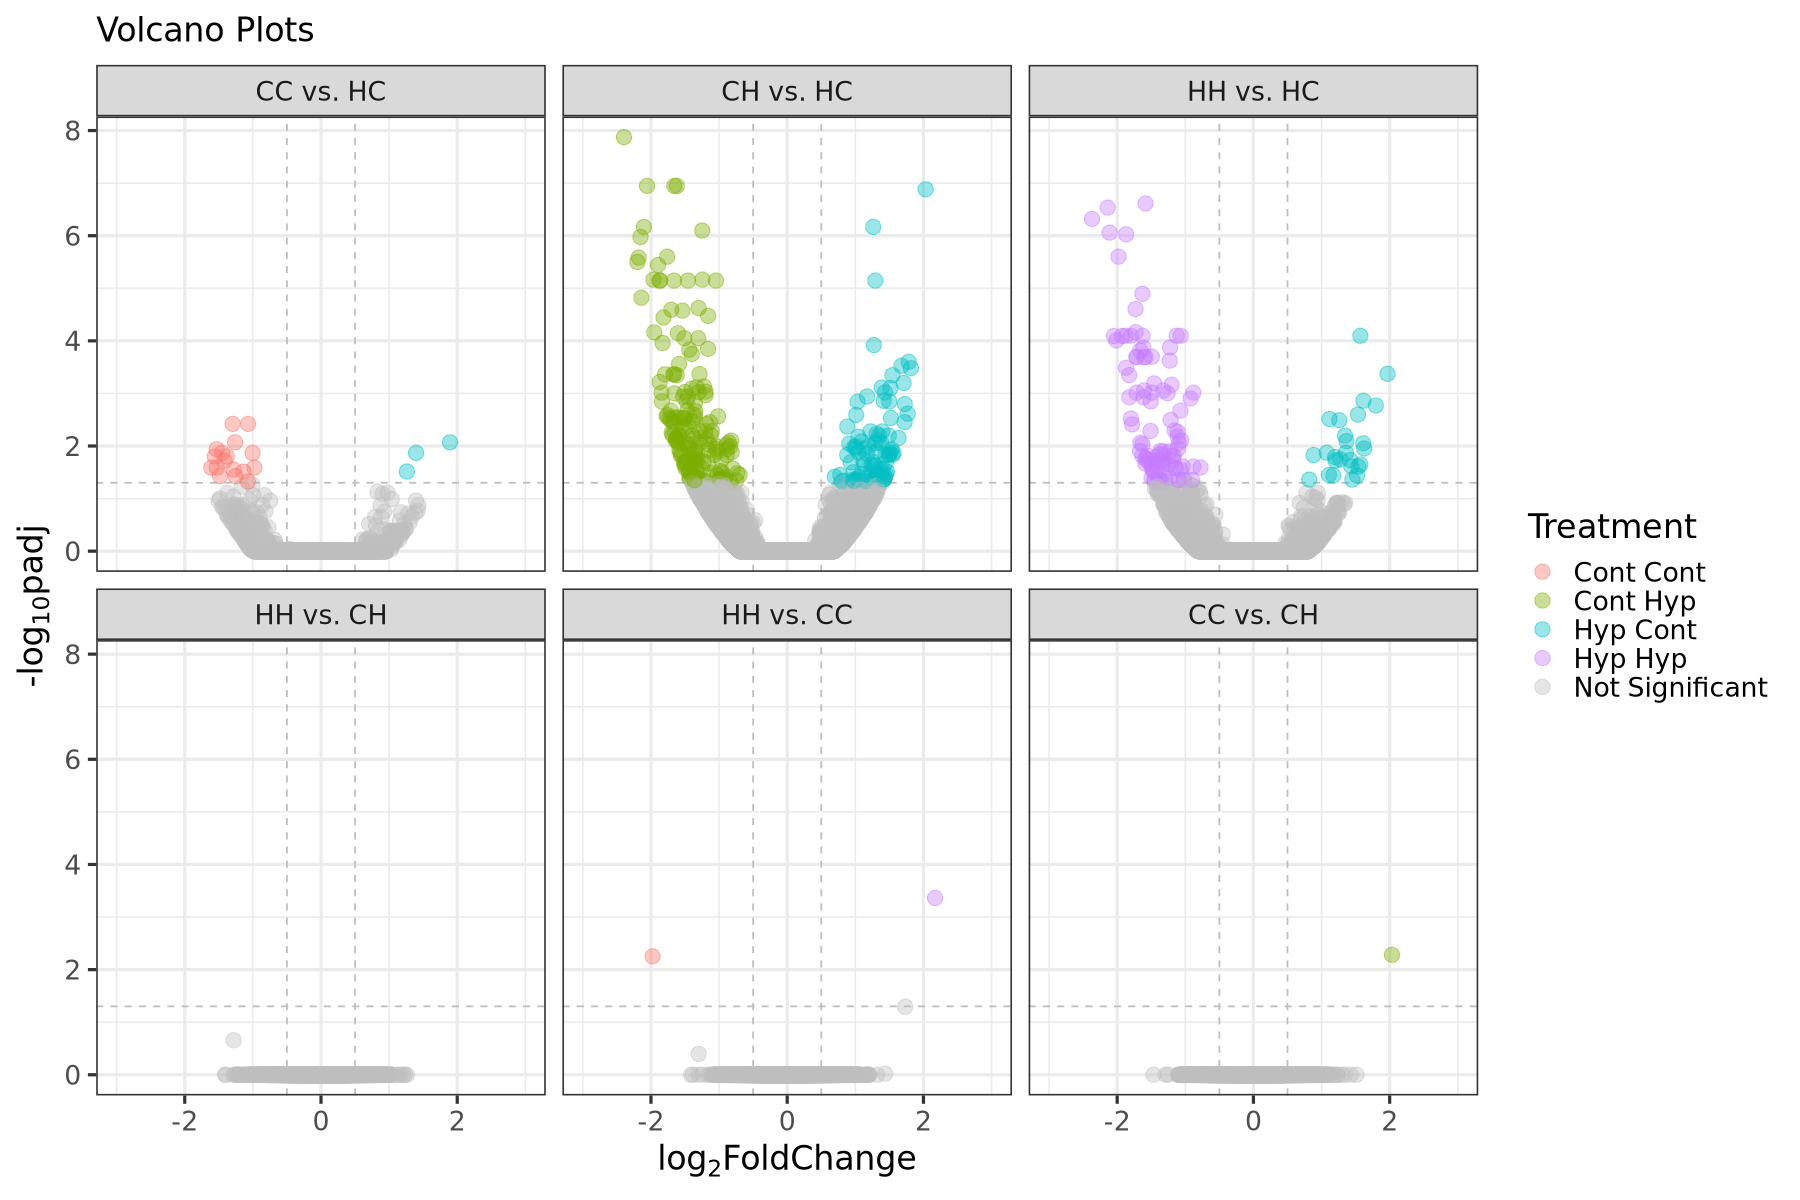

In [16]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "CC vs. HC", 
                CH_HC = "CH vs. HC", 
                HH_HC = "HH vs. HC",
               HH_CH = "HH vs. CH",
               HH_CC = "HH vs. CC",
               CC_CH = "CC vs. CH")

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values = c('#F8766D','#7CAE00', '#00BFC4', '#C77CFF', 'gray'),
                                           labels=c('Cont Cont','Cont Hyp', 'Hyp Cont', 'Hyp Hyp', 'Not Significant')) + 
facet_wrap(~pair, labeller = as_labeller(new_labels)) + 
                        theme_bw(base_size=20) + 
                        labs(subtitle = 'Volcano Plots',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

just adding another option for how things are labelled

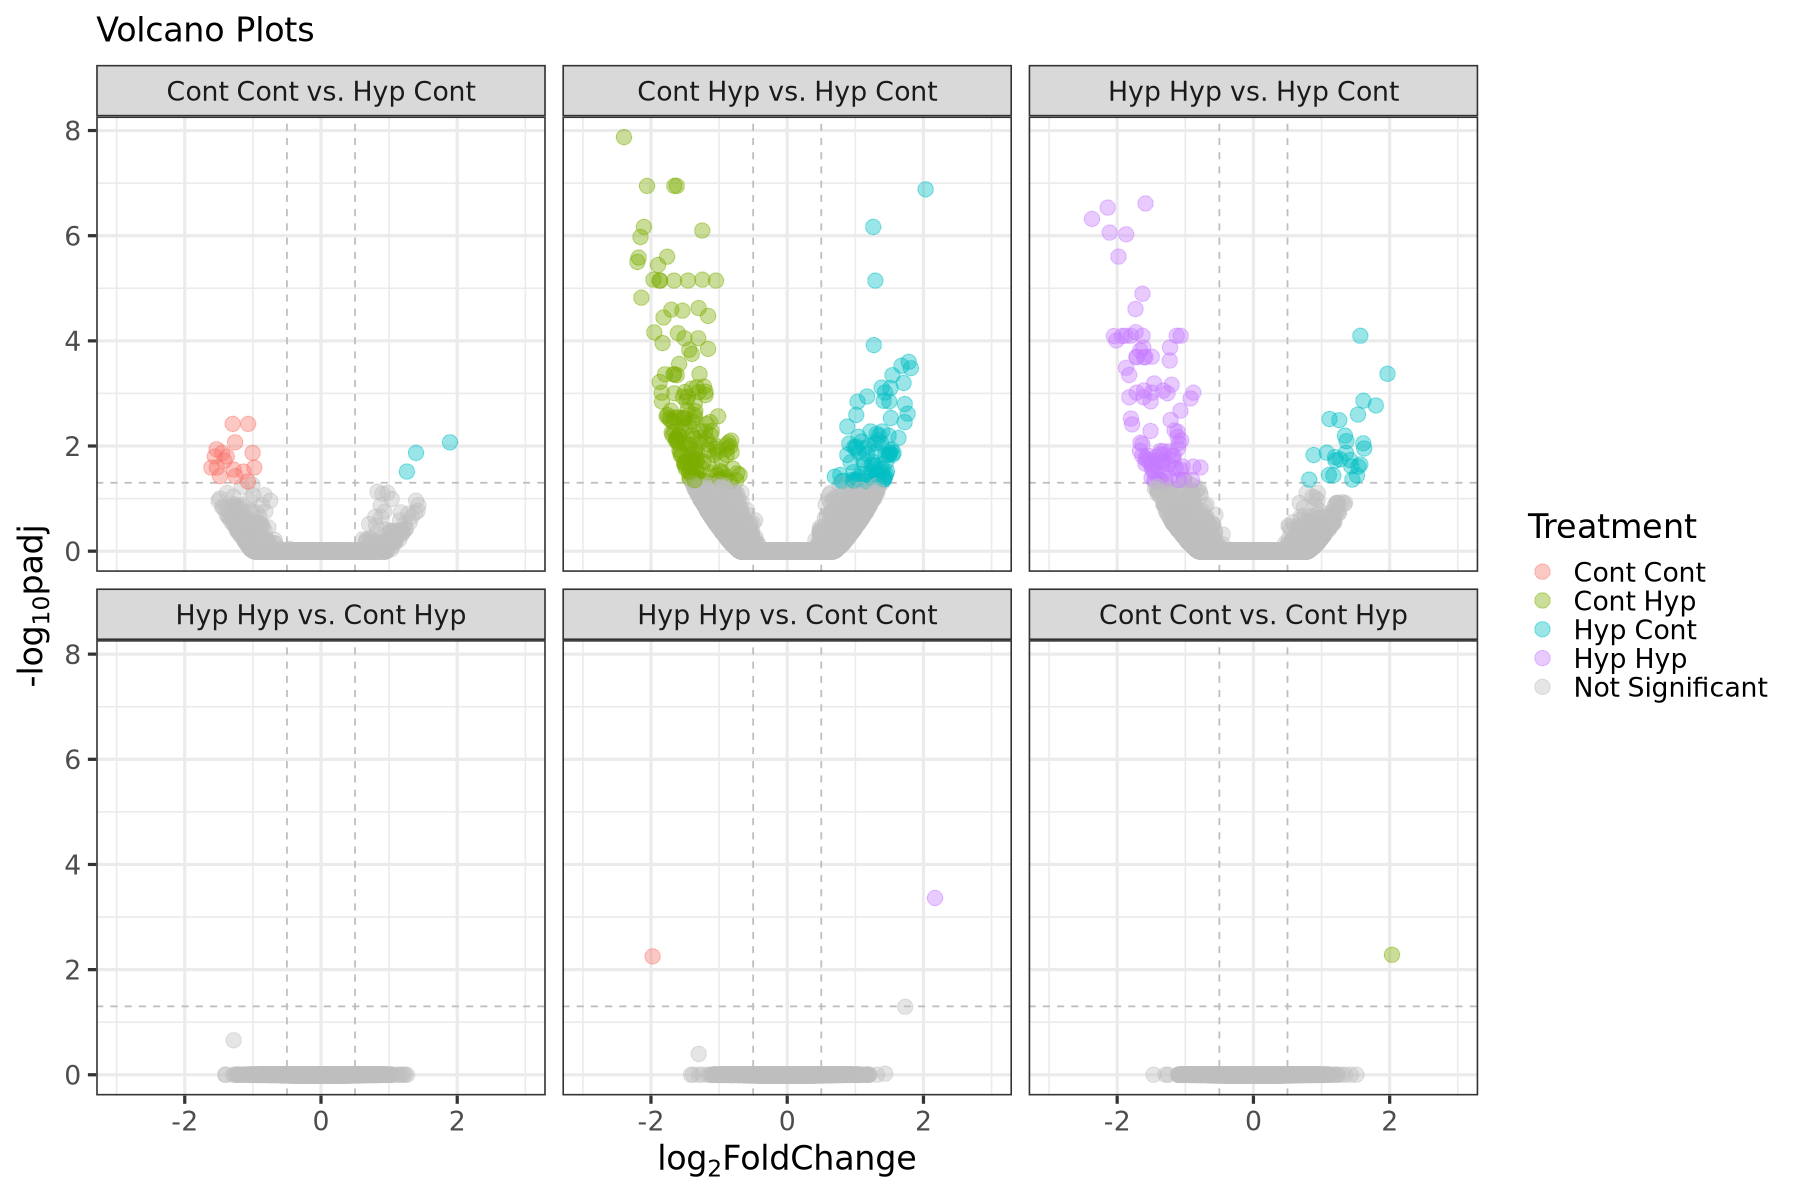

In [17]:
options(repr.plot.width=15, repr.plot.height=10)

# setting order of grids for facet_wrap
mega_df$pair <- factor(mega_df$pair, levels = c('CC_HC','CH_HC','HH_HC', 'HH_CH','HH_CC','CC_CH'))

# renaming grid labels
new_labels <- c(CC_HC = "Cont Cont vs. Hyp Cont", 
                CH_HC = "Cont Hyp vs. Hyp Cont", 
                HH_HC = "Hyp Hyp vs. Hyp Cont",
               HH_CH = "Hyp Hyp vs. Cont Hyp",
               HH_CC = "Hyp Hyp vs. Cont Cont",
               CC_CH = "Cont Cont vs. Cont Hyp")

volcano_MEGA <- ggplot(data = mega_df, aes(x = log2FoldChange,
                                             y = -log10(padj),
                                             col = methyl)) +
                        geom_vline(xintercept = c(-0.5,0.5),
                                   col = "gray",
                                   linetype = 'dashed') + # fold change threshold line
                        geom_hline(yintercept = -log10(0.05), 
                                   col = "gray",
                                   linetype = 'dashed') + # padj threshold line
                        geom_point(size=4, alpha =0.4) +
scale_color_manual(values = c('#F8766D','#7CAE00', '#00BFC4', '#C77CFF', 'gray'),
                                           labels=c('Cont Cont','Cont Hyp', 'Hyp Cont', 'Hyp Hyp', 'Not Significant')) + 
facet_wrap(~pair, labeller = as_labeller(new_labels)) + 
                        theme_bw(base_size=20) + 
                        labs(subtitle = 'Volcano Plots',
                             col='Treatment', 
                             x = expression("log"[2]*"FoldChange"), 
                             y = expression("-log"[10]*"padj")) + 
                        scale_x_continuous(limits = c(-3,3))

volcano_MEGA

### Venn diagram of all sig. DMGs

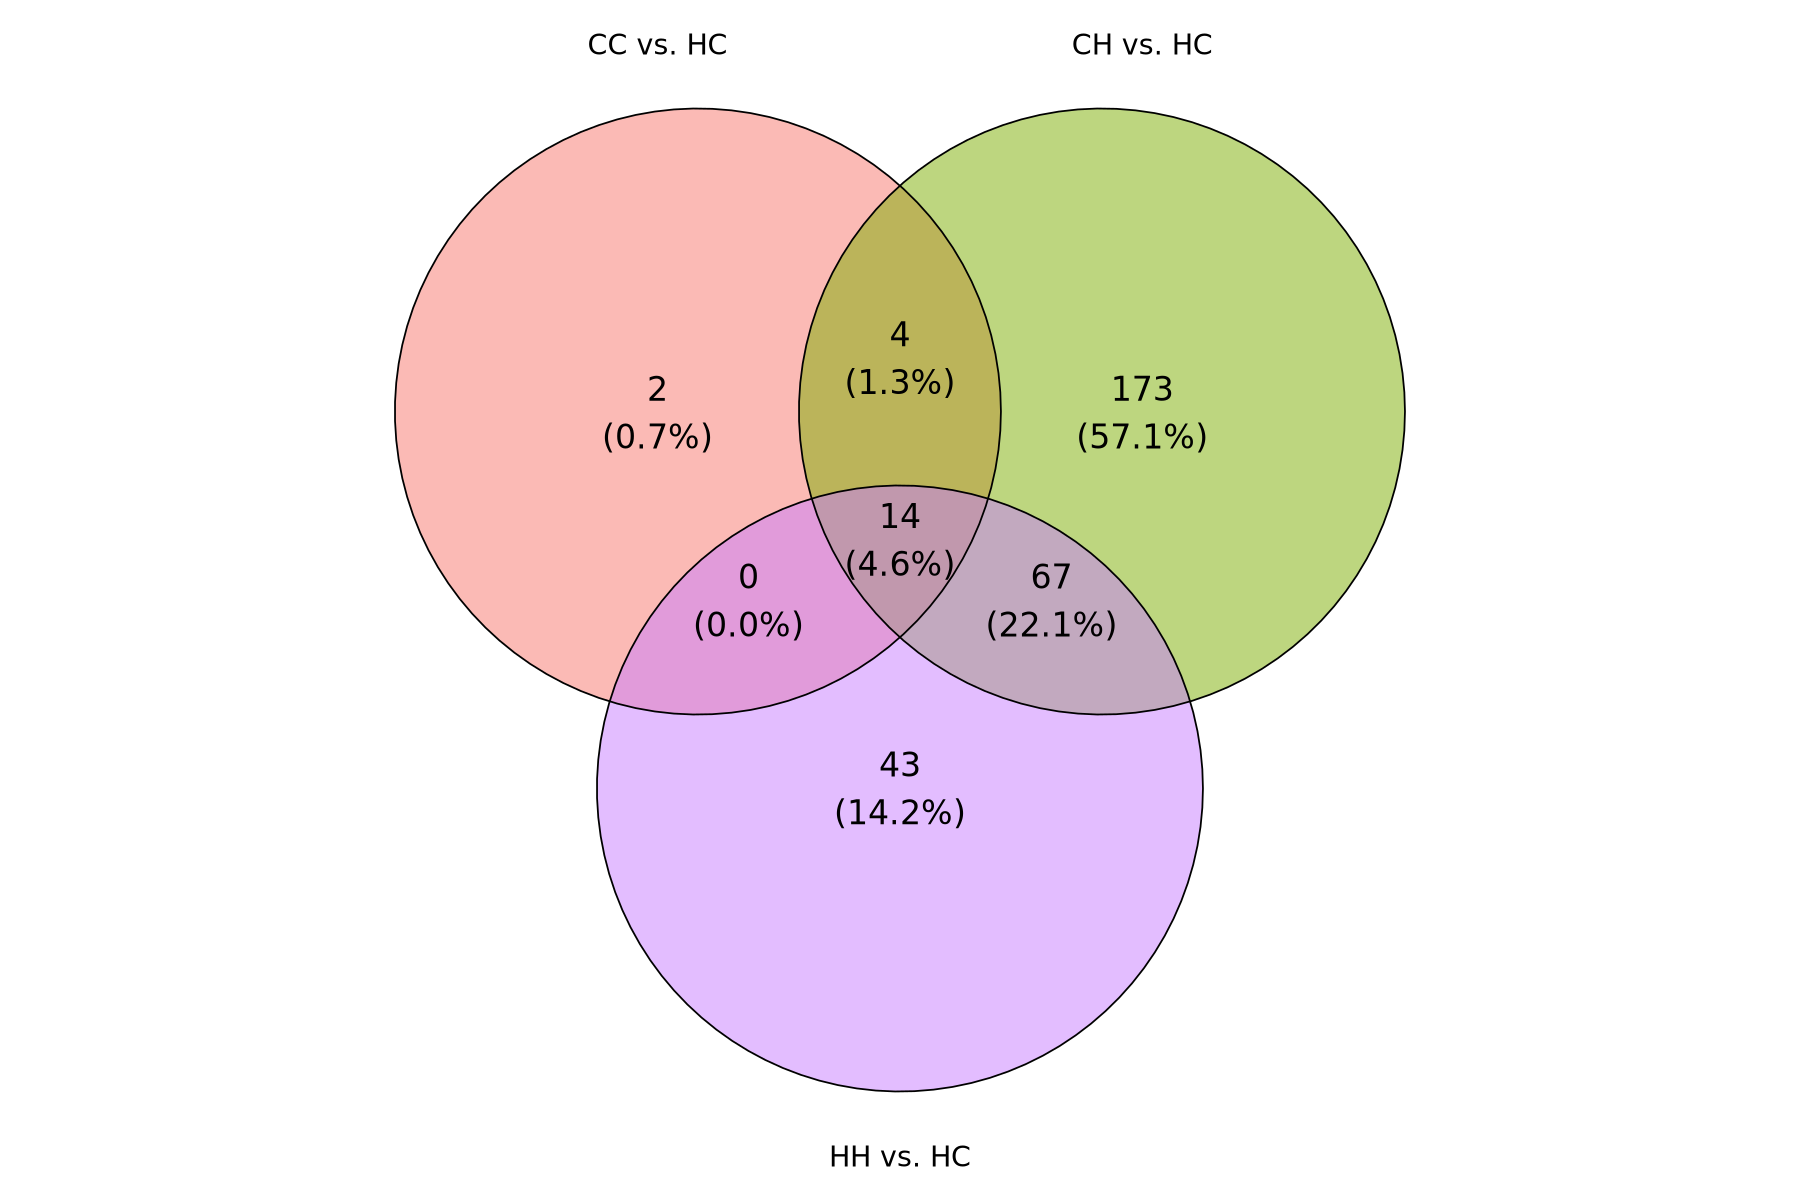

In [18]:
x = list(A = sig_CC_HC$X,
         B = sig_CH_HC$X, 
         C = sig_HH_HC$X)

names(x) <- c('CC vs. HC',
              'CH vs. HC',
              'HH vs. HC')

# same colors as used in the volcano plots
custom_colors <- c('#F8766D',  '#7CAE00', '#C77CFF')

ggvenn(x,
      set_name_size = 6,
       text_size = 7,
      stroke_size = 0.5, 
       show_percentage = TRUE,
      fill_color = custom_colors)

### shared sig DMGs for the pairwise comparisons

In [19]:
# pulling out the 14 shared genes

# Merge the data frames on the 'gene' column
shared_genes14 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CC_HC, sig_CH_HC, sig_HH_HC))

shared_genes14 <- as.data.frame(shared_genes14)
                    
# View the result
dim(shared_genes14)


[1] 14 19

pulling out the **81 shared genes between HH vs. HC and CH vs. HC**

In [20]:
# pulling out the 81 shared genes

# Merge the data frames on the 'gene' column
shared_genes81 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CH_HC, sig_HH_HC))
                    
shared_genes81 <- as.data.frame(shared_genes81)

# View the result
dim(shared_genes81)


[1] 81 13

pulling out the **67 genes shared ONLY between HH vs. HC and CH vs. HC**

In [21]:
# to remove the 14 genes that are shared between all the comparisons, and to only look at those shared between just these two...
shared_genes67 <- shared_genes81[!shared_genes81$X %in% shared_genes14$X, ]
dim(shared_genes67)

[1] 67 13

pulling out the **18 genes shared bewteen CC vs. HC and CH vs. HC**

In [22]:
# pulling out the 18 shared genes

# Merge the data frames on the 'gene' column
shared_genes18 <- Reduce(function(x, y) merge(x, y, by = "X"), list(sig_CC_HC, sig_CH_HC))  
shared_genes18 <- as.data.frame(shared_genes18)

dim(shared_genes18)

[1] 18 13

pulling out the **4 genes shared between ONLY CC vs. HC and CH vs. HC**

In [23]:
# to remove the 4 genes that are shared between all the comparisons, and to only look at those shared between just these two...
shared_genes4 <- shared_genes18[!shared_genes18$X %in% shared_genes14$X, ]
dim(shared_genes4)

[1]  4 13

### unique sig DMGs for pairwise comparison

pulling out the **173 unique sig DMGs for CH vs. HC**

In [24]:
unique_CH_HC <- sig_CH_HC[!sig_CH_HC$X %in% c(shared_genes14$X, shared_genes4$X, shared_genes67$X), ]
dim(unique_CH_HC)

[1] 173   7

pulling out the **2 unique sig DMGs for CC vs. HC**

In [25]:
unique_CC_HC <- sig_CC_HC[!sig_CC_HC$X %in% c(shared_genes14$X, shared_genes4$X), ]
dim(unique_CC_HC)

[1] 2 7

pulling out the **43 unique sig DMGs for HH vs. HC**

In [26]:
unique_HH_HC <- sig_HH_HC[!sig_HH_HC$X %in% c(shared_genes14$X, shared_genes67$X), ]
dim(unique_HH_HC)

[1] 43  7

Now have multiple dfs that contain shared and unique sig DMGs from the Venn diagram of pairwise comparisons with HC

**Shared sig DMGs**:
- shared_genes14 - shared between all 3 comparisons
- shared_genes67 - shared *ONLY* between HH vs. HC and CH vs. HC
- shared_genes81 - shared between HH vs. HC and CH vs. HC (including the 14 that are shared between all)
- shared_genes18 - shared between CC vs. HC and CH vs. HC (including the 14 that are shared between all)
- shared_genes4 - shared *ONLY* between CC vs. HC and CH vs. HC

**Unique sig DMGs**:
- unique_HH_HC - 43 sig DMGs
- unique_CH_HC - 173 sig DMGs
- unique_CC_HC - 2 sig DMGs

## Functional categories of DMGs
Assigning functional categories to DMG

This is being done with [g:Profiler](https://cran.r-project.org/web/packages/gprofiler2/vignettes/gprofiler2.html)

I'm mainly using the **g:GOst tool**, which enables functional profiling of gene lists
- ordered_query = FALSE, meaning the order of genes will *not* be taken into account
- significant = TRUE, returns only the statistically significant results

### shared DMGs

In [76]:
#BiocManager::install("gprofiler2")
library(gprofiler2)

In [105]:
options(repr.plot.width=10, repr.plot.height=5)

shared_genes14 - **14 DMGs shared between all 3 comparisons**

In [126]:
gene_list14 <- shared_genes14$X

# Run g:Profiler analysis
gost_results14 <- gost(gene_list14, organism = "cvgca002022765v4")  # Use the correct organism code


# Check the results
results14 <- gost_results14$result
head(results14)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

there aren't any significant GO terms for these 14 genes... this can happen with small queries of not directly related genes - can instead look at 'All results' to show terms where at least one input gene belongs to.





,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,FALSE,0.6004943,12,5,1,0.2,0.08333333,GO:0006751,GO:BP,glutathione catabolic process,9567,2477,GO:00067....
2,query_1,FALSE,0.6004943,12,5,1,0.2,0.08333333,GO:0043171,GO:BP,peptide catabolic process,9567,10920,GO:00065....
3,query_1,FALSE,0.6004943,12,5,1,0.2,0.08333333,GO:0044273,GO:BP,sulfur compound catabolic process,9567,11314,GO:00067....
4,query_1,FALSE,0.7002837,14,5,1,0.2,0.07142857,GO:0051170,GO:BP,import into nucleus,9567,13994,GO:0006913
5,query_1,FALSE,0.7002837,14,5,1,0.2,0.07142857,GO:0006606,GO:BP,protein import into nucleus,9567,2350,GO:00068....
6,query_1,FALSE,0.7002837,14,5,1,0.2,0.07142857,GO:0034504,GO:BP,protein localization to nucleus,9567,8968,GO:0033365


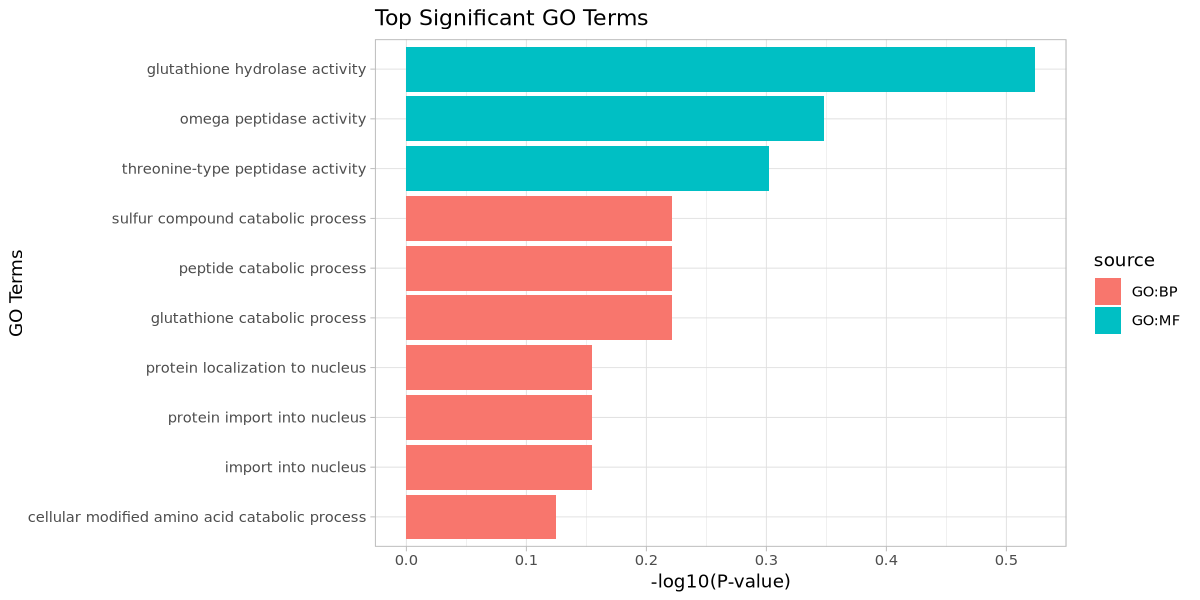

In [130]:
gene_list14 <- shared_genes14$X

# Run g:Profiler analysis
gost_results14 <- gost(gene_list14, organism = "cvgca002022765v4", significant = FALSE)  # Use the correct organism code


# Check the results
results14 <- gost_results14$result
head(results14)

# Create a bar plot of the top 10 significant terms
top_terms14 <- head(results14[order(results14$p_value), ], 10)

ggplot(top_terms14, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()


shared_genes67 - **67 DMGs shared ONLY between HH_HC and CH_HC**

In [124]:
gene_list67 <- shared_genes67$X

# Run g:Profiler analysis
gost_results67 <- gost(gene_list67, organism = "cvgca002022765v4", ordered_query = FALSE)  # Use the correct organism code

# Check the results
results67 <- gost_results67$result
head(results67)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.002076803,716,13,8,0.6153846,0.011173184,GO:0005737,GO:CC,cytoplasm,5515,309,GO:00056....
2,query_1,TRUE,0.007114957,1819,13,11,0.8461538,0.006047279,GO:0005622,GO:CC,intracellular anatomical structure,5515,237,GO:0110165
3,query_1,TRUE,0.013098949,1544,13,10,0.7692308,0.006476684,GO:0043229,GO:CC,intracellular organelle,5515,1881,GO:00056....
4,query_1,TRUE,0.014708271,1564,13,10,0.7692308,0.006393862,GO:0043226,GO:CC,organelle,5515,1878,GO:0110165
5,query_1,TRUE,0.028012527,1026,13,8,0.6153846,0.007797271,GO:0043231,GO:CC,intracellular membrane-bounded organelle,5515,1883,GO:00432....
6,query_1,TRUE,0.036168568,1064,13,8,0.6153846,0.007518797,GO:0043227,GO:CC,membrane-bounded organelle,5515,1879,GO:0043226


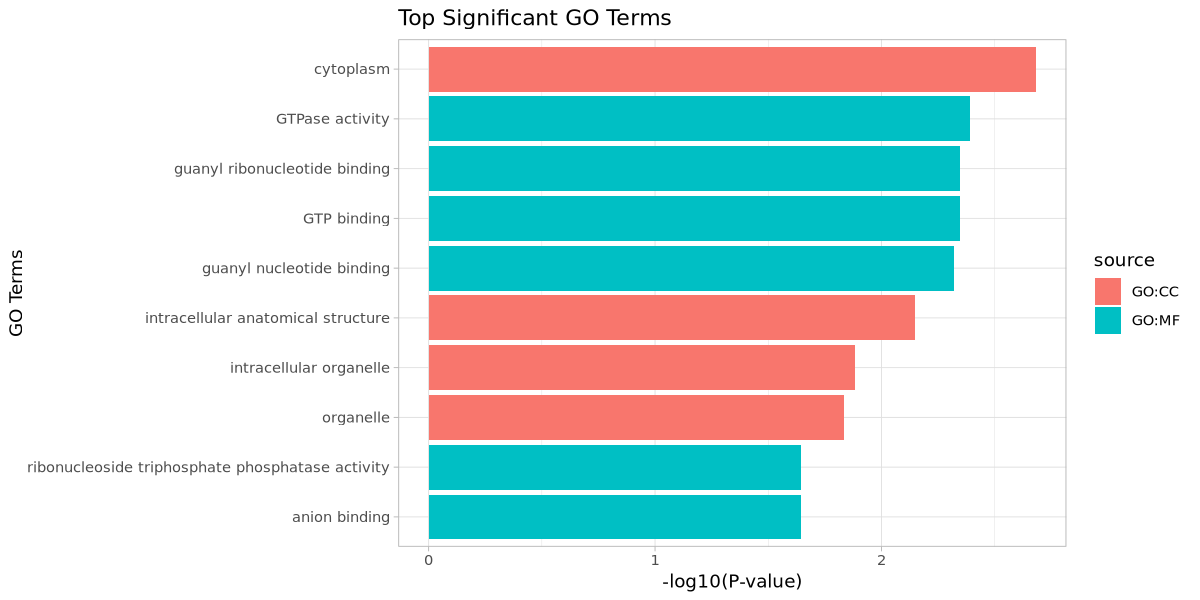

In [125]:
# Create a bar plot of the top 10 significant terms
top_terms67 <- head(results67[order(results67$p_value), ], 10)

ggplot(top_terms67, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()




shared_genes81 - **81 DMGs shared between HH_HC and CH_HC** (including the 14 shared between all)

In [131]:
gene_list81 <- shared_genes81$X

# Run g:Profiler analysis
gost_results81 <- gost(gene_list81, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results81 <- gost_results81$result
head(results81)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.006066216,49,32,4,0.1250000,0.081632653,GO:0072594,GO:BP,establishment of protein localization to organelle,9567,17976,GO:00333....
2,query_1,TRUE,0.012728859,59,32,4,0.1250000,0.067796610,GO:0033365,GO:BP,protein localization to organelle,9567,8456,GO:0008104
3,query_1,TRUE,0.001172991,1819,15,13,0.8666667,0.007146784,GO:0005622,GO:CC,intracellular anatomical structure,5515,237,GO:0110165
4,query_1,TRUE,0.001827954,1544,15,12,0.8000000,0.007772021,GO:0043229,GO:CC,intracellular organelle,5515,1881,GO:00056....
5,query_1,TRUE,0.002105784,1564,15,12,0.8000000,0.007672634,GO:0043226,GO:CC,organelle,5515,1878,GO:0110165
6,query_1,TRUE,0.009370842,716,15,8,0.5333333,0.011173184,GO:0005737,GO:CC,cytoplasm,5515,309,GO:00056....


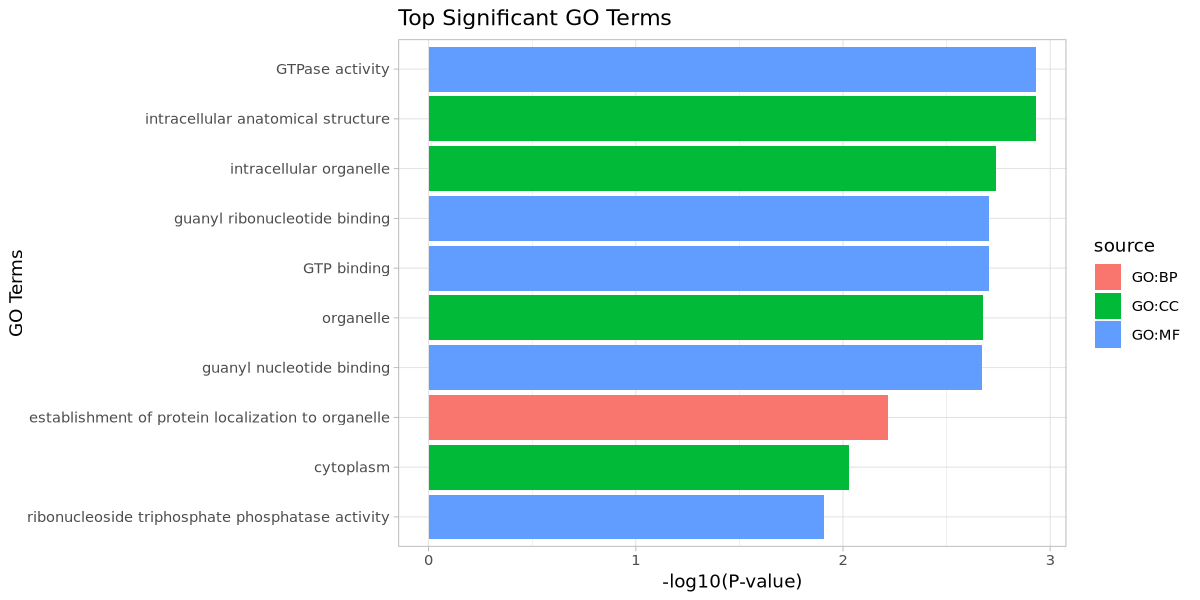

In [132]:
# Create a bar plot of the top 10 significant terms
top_terms <- head(results81[order(results81$p_value), ], 10)

ggplot(top_terms, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()


shared_genes18 - **shared between CC_HC and CH_HC** (including the 14 shared between all)

In [111]:
gene_list18 <- shared_genes18$X

# Run g:Profiler analysis
gost_results18 <- gost(gene_list18, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results18 <- gost_results18$result
head(results18)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

no significant GO terms in the list of 18 ... looking at all genes

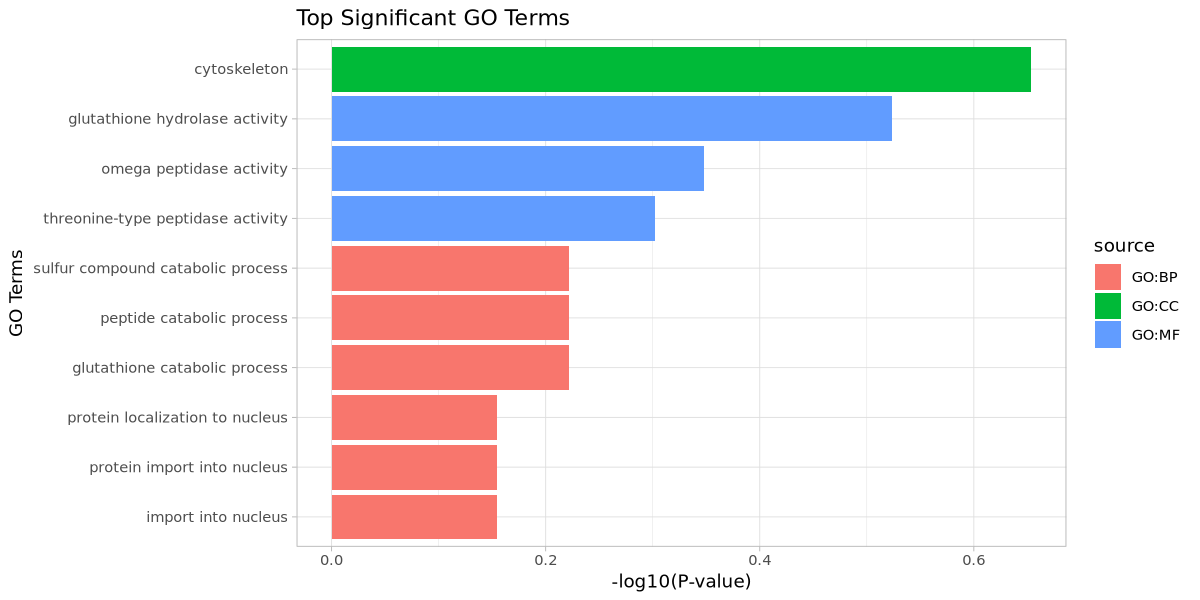

In [133]:
gene_list18 <- shared_genes18$X

# Run g:Profiler analysis
gost_results18 <- gost(gene_list18, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results18 <- gost_results18$result

# Create a bar plot of the top 10 significant terms
top_terms <- head(results18[order(results18$p_value), ], 10)

ggplot(top_terms, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()



shared_genes4 - **shared ONLY between CC_HC and CH_HC**

In [112]:
gene_list4 <- shared_genes4$X

# Run g:Profiler analysis
gost_results4 <- gost(gene_list4, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results4 <- gost_results4$result
head(results4)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

no significant GO terms in the list of 4...looking at all genes

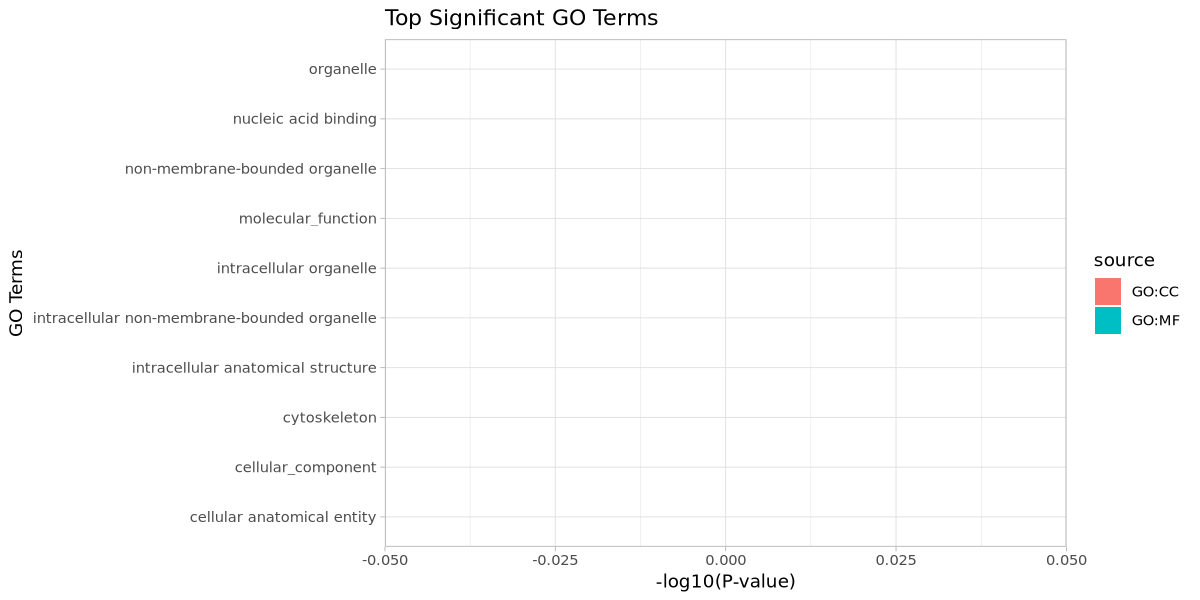

In [135]:
gene_list4 <- shared_genes4$X

# Run g:Profiler analysis
gost_results4 <- gost(gene_list4, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results4 <- gost_results4$result

# Create a bar plot of the top 10 significant terms
top_terms <- head(results4[order(results4$p_value), ], 10)

ggplot(top_terms, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()



### unique DMGs

unique_HH_HC - **DMGs unique to HH vs. HC comparison**

(43 sig DMGs)

In [118]:
gene_list43 <- unique_HH_HC$X

# Run g:Profiler analysis
gost_results43 <- gost(gene_list43, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results43 <- gost_results43$result
head(results43)

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.04004633,9,20,2,0.10000000,0.2222222,GO:0042274,GO:BP,ribosomal small subunit biogenesis,9567,10417,GO:00226....
2,query_1,TRUE,0.01412368,14,22,2,0.09090909,0.1428571,GO:0004879,GO:MF,nuclear receptor activity,17566,1143,GO:00009....
3,query_1,TRUE,0.01412368,14,22,2,0.09090909,0.1428571,GO:0098531,GO:MF,ligand-activated transcription factor activity,17566,9141,GO:0003700


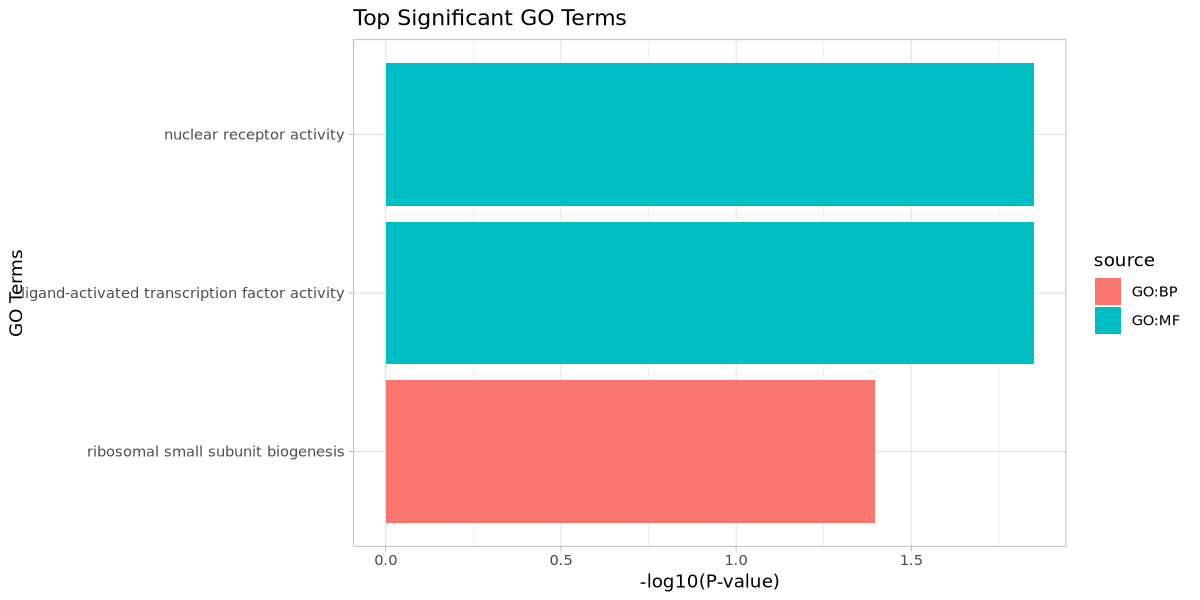

In [113]:
# Create a bar plot of the top 10 significant terms
top_terms43 <- head(results43[order(results43$p_value), ], 10)

ggplot(top_terms43, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()


looking for top 10, regardless of significance

,query,significant,p_value,term_size,query_size,intersection_size,precision,recall,term_id,source,term_name,effective_domain_size,source_order,parents
,<chr>,<lgl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<int>,<int>,<list>
1,query_1,TRUE,0.04004633,9,20,2,0.10,0.222222222,GO:0042274,GO:BP,ribosomal small subunit biogenesis,9567,10417,GO:00226....
2,query_1,FALSE,0.56500527,1,20,1,0.05,1.000000000,GO:0035494,GO:BP,SNARE complex disassembly,9567,9373,GO:00161....
3,query_1,FALSE,0.56500527,1,20,1,0.05,1.000000000,GO:0048384,GO:BP,retinoic acid receptor signaling pathway,9567,13144,GO:0030522
4,query_1,FALSE,0.75592290,138,20,3,0.15,0.021739130,GO:0006310,GO:BP,DNA recombination,9567,2138,GO:0006259
5,query_1,FALSE,1.00000000,361,20,1,0.05,0.002770083,GO:0019637,GO:BP,organophosphate metabolic process,9567,6166,GO:00067....
6,query_1,FALSE,1.00000000,4,20,1,0.05,0.250000000,GO:0030522,GO:BP,intracellular receptor signaling pathway,9567,7073,GO:0007165


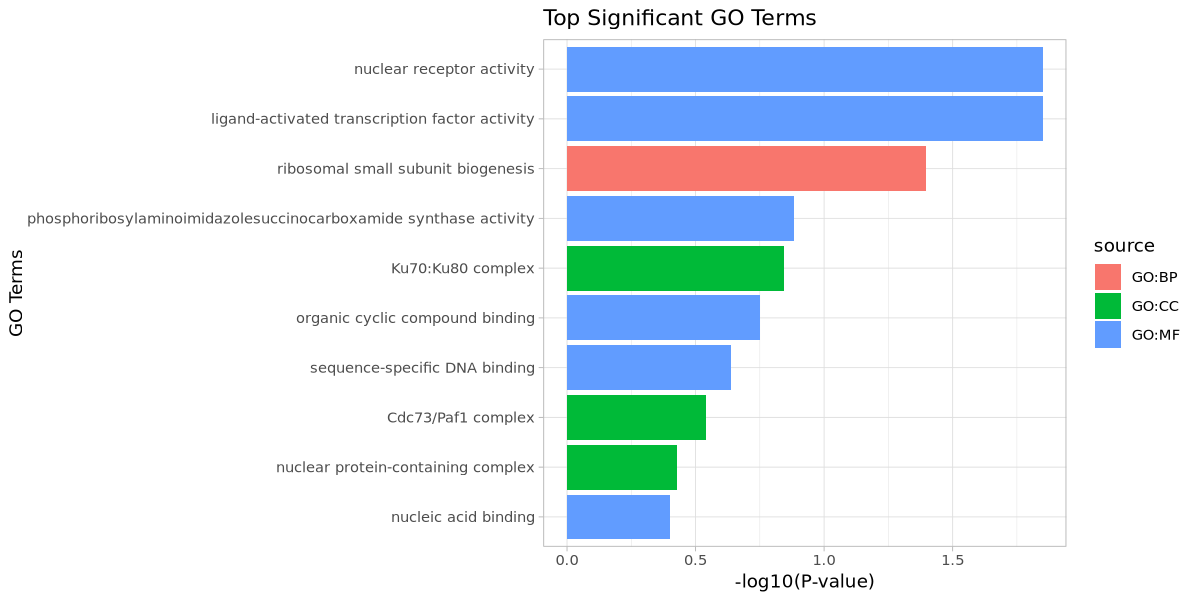

In [138]:
gene_list43 <- unique_HH_HC$X

# Run g:Profiler analysis
gost_results43 <- gost(gene_list43, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results43 <- gost_results43$result
head(results43)

# Create a bar plot of the top 10 significant terms
top_terms43 <- head(results43[order(results43$p_value), ], 10)

ggplot(top_terms43, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()

unique_CH_HC - **DMGs unique to CH vs. HC**

(173 sig DMGs)

In [114]:
gene_list173 <- unique_CH_HC$X

# Run g:Profiler analysis
gost_results173 <- gost(gene_list173, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results173 <- gost_results173$result
head(results173)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

no significant GO terms, so looking at not significant

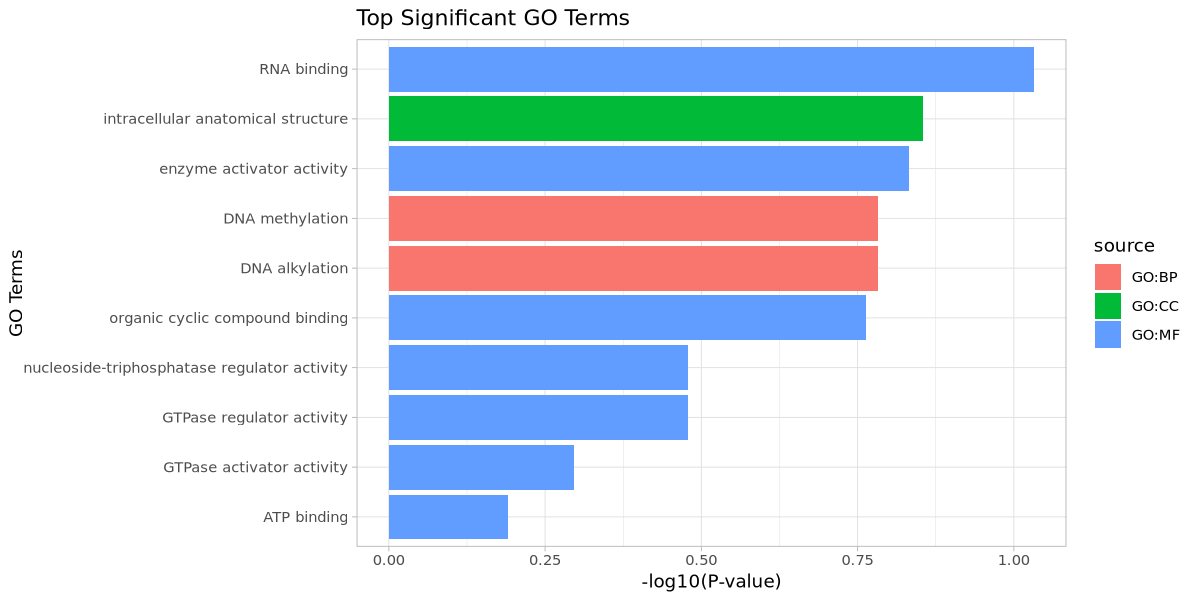

In [136]:
gene_list173 <- unique_CH_HC$X

# Run g:Profiler analysis
gost_results173 <- gost(gene_list173, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results173 <- gost_results173$result

# Create a bar plot of the top 10 significant terms
top_terms173 <- head(results173[order(results173$p_value), ], 10)

ggplot(top_terms173, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()

unique_CC_HC - **DMGs unique to CC vs. HC**

(2 sig DMGs)

In [115]:
gene_list2 <- unique_CC_HC$X

# Run g:Profiler analysis
gost_results2 <- gost(gene_list2, organism = "cvgca002022765v4")  # Use the correct organism code

# Check the results
results2 <- gost_results2$result
head(results2)

No results to show
Please make sure that the organism is correct or set significant = FALSE



NULL

no significant GO terms, so looking at not significant

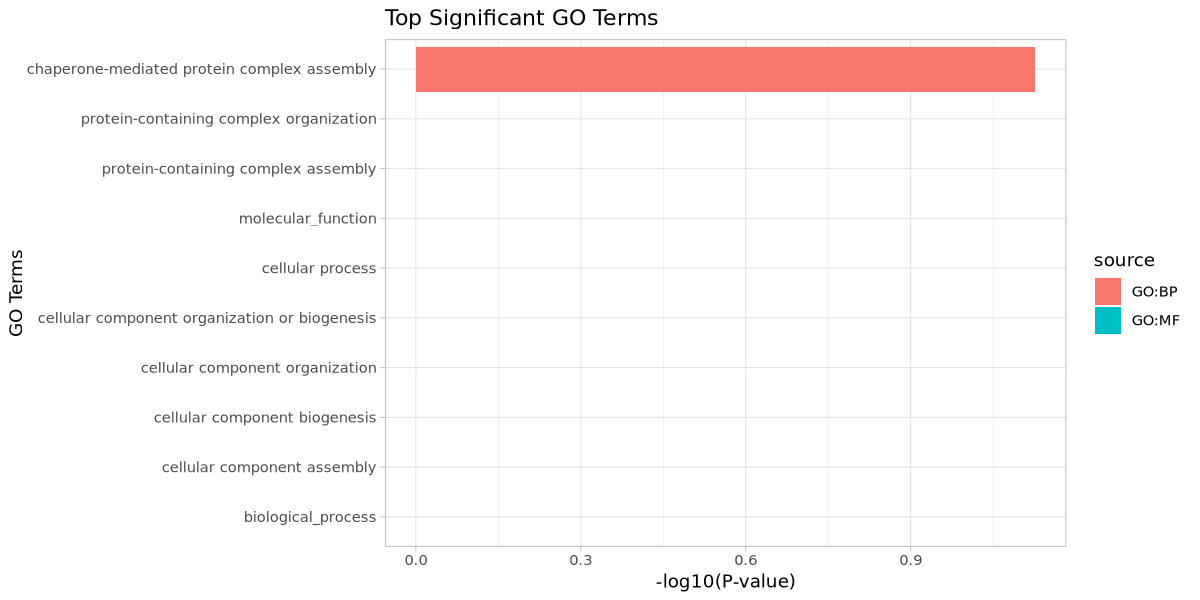

In [137]:
gene_list2 <- unique_CC_HC$X

# Run g:Profiler analysis
gost_results2 <- gost(gene_list2, organism = "cvgca002022765v4", significant=FALSE)  # Use the correct organism code

# Check the results
results2 <- gost_results2$result

# Create a bar plot of the top 10 significant terms
top_terms2 <- head(results2[order(results2$p_value), ], 10)

ggplot(top_terms2, aes(x = reorder(term_name, -p_value), y = -log10(p_value), fill = source)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(x = "GO Terms", y = "-log10(P-value)", title = "Top Significant GO Terms") +
  theme_light()